## Terragon Data Science Challenge
In this project I'll work with a dataset of Terragon's customers previous campaigns, containing customers demograghics and transaction records.

The tasks I'm to do are as follows:

#### Task A 
In mobile marketing, conversion rate (CVR) is a metric that measures the number of conversions advertisers receive on their ads per number of clicks. Terragon is sharing data from previous campaigns for you to develop models predicting ad CVR for an ad campaign related to downloading or installing an application. Given a user, what is the probability that he (or she) will install or download an app? 

You will be given a training and validation dataset for this task. 
The outcome of this task should be a dataframe (the msisdn is a unique identifier), probability(likelihood of converting), result( whether a user will convert or not).

Default threshold was set to 0.50 in this sample file. Use any threshold you deem fit for this task.

#### Task B 
In this project, you have been provided with extensive sample data of the general population on Terragon database and established users who have installed/downloaded an app in order to create customer segments. The data includes demographic and transaction records of customers. Terragon AdOps (Advertising Operations) team would like to leverage ML to launch a targeted marketing ad campaign that is tailored to a specific group of customers. In order for this campaign to be successful, Terragon has to divide its customers into distinctive groups. This process is known as "customer segmentation" and it is crucial for maximizing marketing campaign conversion rate. 

Build segments to identify potential customers that will download or install an app. 
Hint: "What makes users who download/install an app and users who do not different 
through demographic data?".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

In [2]:
installdownload = pd.read_csv('installs_download.csv') # training data task a
validation = pd.read_csv('validation.csv') # testing data task a
installsandownload = pd.read_csv('Installs and Download.csv') #task b
general_population = pd.read_csv('General population.csv') # task b

In [3]:
general_population.head()

,msisdn,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,customer_value,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name
0,004208affd43e227fee976bff7e1d4f9,399.22,0.0,0.0,0.000000,0.0,46.0,medium,25,F,No,north central,benue,kwande,nokia,1280,Smartphone,1282,symbian
1,004a9ab7e14854125fe0a8baf7d1e085,686.34,75.0,0.0,6.800000,0.0,46.0,medium,24,M,No,north east,taraba,takum,alcatel,ot735i,Feature Phone,proprietary os,proprietary os
2,006924ffe0a892045b2d21858852c3b6,2392.28,295.0,12.0,925.500000,700.0,46.0,high,42,F,No,south west,ekiti,ado ekiti,tecno,t349,Feature Phone,proprietary os,proprietary os
3,006a45bb6af240dfa54939e224a0d322,588.82,0.0,24.0,593.333334,0.0,186.0,medium,32,M,No,north east,borno,askira/uba,tecno,t350,Feature Phone,proprietary os,proprietary os
4,00720f80366757a3ca167d417a7b34bd,0.00,4655.0,0.0,336.845000,0.0,46.0,low,25,M,No,NaN,NaN,karu,tecno,t484,Feature Phone,proprietary os,proprietary os


In [4]:
validation.head()

,msisdn,timeline,timestamp,ad_text,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,...,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name
0,802c3dc863098b346e3d62c71107f032,1.561735e+12,2019-08-23T08:30:40.000Z,Listen to the latest hit songs from your favor...,1052.470000,NaN,NaN,NaN,NaN,44.0,...,M,No,south east,abia,ukwa east,tecno,spark 2 (ka7o),Smartphone,google,android
1,0f1d98624ee2d09f0ef2f8cb8e782507,1.561991e+12,2019-07-02T15:38:45.000Z,Listen to the latest hit songs from your favor...,22078.900000,420.0,16.0,1300.32,1000.053,49.0,...,M,No,south west,lagos,eti osa,infinix,hot 6 pro (x608),Smartphone,google,android
2,450c1bf1096aa4c9f610791173169020,1.561735e+12,2019-07-03T17:32:42.000Z,Listen to the latest hit songs from your favor...,0.000000,NaN,NaN,NaN,NaN,46.0,...,M,No,south west,ogun,ifo,tecno,spark,Smartphone,google,android
3,faf65cb4c3e7be71eff95bd62a3aa9bc,1.560940e+12,2019-06-24T15:05:41.000Z,Listen to the latest hit songs from Phyno on H...,2293.252842,NaN,NaN,NaN,NaN,46.0,...,M,No,south west,lagos,mushin,lenovo,lenovo a plus,Smartphone,lenovo vibe a plus (a1010a20),google
4,6338fc13c44fad7de8cfb6e7259a2c75,1.561469e+12,2019-06-27T18:16:30.000Z,Stand a chance to win airtime when you downloa...,0.000000,0.0,40.0,218.27,110.000,26.0,...,M,No,south south,rivers,obio/akpor,infinix,x624b,Smartphone,google,android


In [5]:
installsandownload.head()

,msisdn,timeline,timestamp,event_type,ad_text,spend_total,spend_vas,sms_cost,spend_voice,spend_data,...,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name
0,af81bb96f9ccd7ecc223495ba44efc70,1.561736e+12,2019-07-07T07:59:40.000Z,install,All your favorite songs in just one place! Dow...,7366.40,0.0,0.0,0.00,0.0,...,M,No,north east,borno,maiduguri,samsung,galaxy a30 (sma305f,Smartphone,ds),google
1,c789beff501049de425199752873ddea,1.559207e+12,2019-05-30T13:34:58.000000,af_complete_registration,Did you know you can listen to Kwam1 straight ...,0.00,60.0,68.0,2081.50,600.0,...,M,No,south west,lagos,ikeja,tecno,camon x (ca7),Smartphone,google,android
2,fa4bcfafd145868f0119bb89bd1b17db,NaN,2019-09-20T07:09:18.408,install,Stop running helter-skelter when you need mone...,3224.95,315.0,88.0,2617.23,60.0,...,M,No,NaN,NaN,NaN,huawei,nova 2i (rnel22),Smartphone,google,android
3,da2ae0a034979823b27139bb9479a6d9,1.562234e+12,2019-07-07T10:46:07.000Z,install,Listen to the latest hit songs from your favor...,26987.85,1540.0,348.0,2576.90,3000.0,...,M,No,south south,delta,oshimili south,tecno,pouvoir 2 (la7),Smartphone,google,android
4,f41536082453e49ad8db7e2eb7365112,NaN,2019-09-17T13:36:03.466,install,Stop running helter-skelter when you need mone...,25328.47,1870.0,192.0,1636.14,1000.0,...,NaN,No,south south,rivers,obio/akpor,generic,smartphone,Smartphone,google,Android


In [6]:
installdownload.head()

,msisdn,timeline,timestamp,event_type,ad_text,spend_total,spend_vas,sms_cost,spend_voice,spend_data,...,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name
0,b0c89e6222030d07623bbdfcd802068a,1.560529e+12,2019-07-01T20:01:54.000Z,install,All your favorite songs in just one place! Dow...,2098.40,0.0,0.0,0.00,0.0,...,M,No,south south,akwa ibom,oron,tecno,f1,Smartphone,google,android
1,8dbe350a0864243bcbcab192c11afb1c,1.561370e+12,2019-07-27T12:45:55.000Z,install,All your favourite songs in just one place! Do...,5361.80,510.0,156.0,2933.86,2000.0,...,M,No,south west,lagos,ikeja,nokia,105 ds (ta1034),Feature Phone,symbian,symbian os
2,e9494ef7df151115dd00cb9e0cd75b28,1.559919e+12,2019-06-09T09:13:49,install,Did you know you can listen to Kwam1 straight ...,6000.26,240.0,24.0,2545.11,1000.0,...,M,No,south west,lagos,kosofe,nokia,3.1 ss (ta1057),Smartphone,google,android
3,3b17282522ff95f763243d9a87f25e01,1.562241e+12,2019-07-08T17:55:46.000Z,install,Listen to the latest hit songs from favourite ...,4202.00,0.0,24.0,1098.80,0.0,...,M,No,south east,abia,aba south,tecno,la7,Smartphone,google,android
4,e14725c65cb0a904d83fa6d5990244d6,1.561736e+12,2019-07-03T17:56:12.000Z,install,All your favorite songs in just one place! Dow...,434.44,0.0,0.0,0.00,0.0,...,M,No,south east,imo,owerri municipal,tecno,f2,Smartphone,google,android


In [7]:
general_population.columns

Index(['msisdn', 'spend_total', 'spend_vas', 'sms_cost', 'spend_voice',
       'spend_data', 'customer_class', 'customer_value', 'age', 'gender',
       'has_bank', 'location_region', 'location_state', 'location_lga',
       'device_manufacturer', 'device_model', 'device_type', 'os_vendor',
       'os_name'],
      dtype='object')

In [8]:
installsandownload.columns

Index(['msisdn', 'timeline', 'timestamp', 'event_type', 'ad_text',
       'spend_total', 'spend_vas', 'sms_cost', 'spend_voice', 'spend_data',
       'customer_class', 'customer_value', 'age', 'gender', 'has_bank',
       'location_region', 'location_state', 'location_lga',
       'device_manufacturer', 'device_model', 'device_type', 'os_vendor',
       'os_name'],
      dtype='object')

In [9]:
installdownload.describe()

,timeline,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,age
count,6.467300e+04,6.523600e+04,49454.000000,49454.000000,49454.000000,49454.000000,65236.000000,65240.000000
mean,1.561868e+12,5.412536e+03,296.555820,75.841659,1758.047869,473.979860,63.385815,41.322502
std,7.871520e+08,2.723368e+04,1461.062417,320.735355,3334.222865,1134.192323,85.325043,104.807616
min,1.558113e+12,0.000000e+00,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,1.561735e+12,2.977375e+02,0.000000,0.000000,6.000000,0.000000,44.000000,26.000000
50%,1.561991e+12,1.492738e+03,20.000000,4.000000,521.080000,0.000000,46.000000,34.000000
75%,1.562241e+12,4.660288e+03,240.000000,48.000000,1988.365000,480.000000,46.000000,43.000000
max,1.562597e+12,2.254318e+06,180545.000000,37472.000000,119140.040000,40801.680000,1051.000000,2020.000000


In [10]:
validation.describe()

,timeline,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,age
count,5.936000e+03,5962.000000,4441.000000,4441.000000,4441.000000,4441.000000,5962.000000,5962.000000
mean,1.561909e+12,4186.080074,263.353637,57.356201,1506.574206,433.622879,64.135693,41.478698
std,8.645238e+08,11597.952072,1078.010972,196.506736,2856.574220,1035.525044,85.590881,106.574919
min,1.558113e+12,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,1.561736e+12,273.317499,0.000000,0.000000,0.400000,0.000000,44.000000,26.000000
50%,1.562241e+12,1355.950000,2.000000,4.000000,452.550000,0.000000,46.000000,34.000000
75%,1.562597e+12,4156.850000,210.000000,40.000000,1705.525000,350.000000,46.000000,43.000000
max,1.562597e+12,376652.377000,55066.000000,3725.000000,45218.250000,22500.000000,1051.000000,2020.000000


In [11]:
installsandownload.describe()

,timeline,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,age
count,1.351300e+04,27425.000000,23880.000000,23880.000000,23880.000000,23880.000000,27425.000000,27483.000000
mean,1.563632e+12,5171.920704,468.238212,81.473031,2089.414920,611.445961,61.062644,38.732671
std,3.089434e+09,10103.018074,2906.213813,202.216169,2969.092444,1140.256801,70.221605,75.401288
min,1.558113e+12,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,1.561736e+12,1158.540000,0.000000,0.000000,250.970000,0.000000,44.000000,28.000000
50%,1.562234e+12,2835.200000,100.000000,24.000000,1183.270000,0.000000,46.000000,35.000000
75%,1.567432e+12,6191.400000,420.000000,80.800000,2783.910000,1000.000000,49.000000,41.000000
max,1.568995e+12,400573.119090,138106.000000,6008.000000,90397.000000,25200.000000,1051.000000,2020.000000


In [12]:
general_population.describe()

,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,age
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.589771e+03,138.773644,21.395610,819.892826,122.037559,56.114154,41.445970
std,8.351637e+03,813.666812,117.921872,1656.200822,537.653915,55.978606,103.598915
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,19.000000,-74.000000
25%,8.355000e+01,0.000000,0.000000,0.000000,0.000000,44.000000,27.000000
50%,4.999000e+02,0.000000,0.000000,208.642500,0.000000,46.000000,34.000000
75%,1.626288e+03,120.000000,8.000000,944.833750,0.000000,46.000000,43.000000
max,2.070064e+06,356042.000000,17703.000000,82132.630000,31000.000000,1055.000000,2020.000000


### Task a

#### Data Preparation

In [13]:
installdownload.columns

Index(['msisdn', 'timeline', 'timestamp', 'event_type', 'ad_text',
       'spend_total', 'spend_vas', 'sms_cost', 'spend_voice', 'spend_data',
       'customer_class', 'customer_value', 'age', 'gender', 'has_bank',
       'location_region', 'location_state', 'location_lga',
       'device_manufacturer', 'device_model', 'device_type', 'os_vendor',
       'os_name'],
      dtype='object')

In [14]:
validation.columns

Index(['msisdn', 'timeline', 'timestamp', 'ad_text', 'spend_total',
       'spend_vas', 'sms_cost', 'spend_voice', 'spend_data', 'customer_class',
       'customer_value', 'age', 'gender', 'has_bank', 'location_region',
       'location_state', 'location_lga', 'device_manufacturer', 'device_model',
       'device_type', 'os_vendor', 'os_name'],
      dtype='object')

The first thing I want to check in the datasets for task a is the target column in installs_download, before exploring other columns in the task a datasets.

In [15]:
installdownload.columns.symmetric_difference(validation.columns)

Index(['event_type'], dtype='object')

In [16]:
installdownload['event_type'].value_counts()

click      63243
install     2348
Name: event_type, dtype: int64

In [17]:
installdownload.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65591 entries, 0 to 65590
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   msisdn               65591 non-null  object 
 1   timeline             64673 non-null  float64
 2   timestamp            65591 non-null  object 
 3   event_type           65591 non-null  object 
 4   ad_text              65591 non-null  object 
 5   spend_total          65236 non-null  float64
 6   spend_vas            49454 non-null  float64
 7   sms_cost             49454 non-null  float64
 8   spend_voice          49454 non-null  float64
 9   spend_data           49454 non-null  float64
 10  customer_class       65236 non-null  float64
 11  customer_value       65236 non-null  object 
 12  age                  65240 non-null  float64
 13  gender               64467 non-null  object 
 14  has_bank             65532 non-null  object 
 15  location_region      59990 non-null 

In [18]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   msisdn               5999 non-null   object 
 1   timeline             5936 non-null   float64
 2   timestamp            5999 non-null   object 
 3   ad_text              5999 non-null   object 
 4   spend_total          5962 non-null   float64
 5   spend_vas            4441 non-null   float64
 6   sms_cost             4441 non-null   float64
 7   spend_voice          4441 non-null   float64
 8   spend_data           4441 non-null   float64
 9   customer_class       5962 non-null   float64
 10  customer_value       5962 non-null   object 
 11  age                  5962 non-null   float64
 12  gender               5883 non-null   object 
 13  has_bank             5991 non-null   object 
 14  location_region      5475 non-null   object 
 15  location_state       5475 non-null   o

In [19]:
installdownload.isnull().sum()

msisdn                     0
timeline                 918
timestamp                  0
event_type                 0
ad_text                    0
spend_total              355
spend_vas              16137
sms_cost               16137
spend_voice            16137
spend_data             16137
customer_class           355
customer_value           355
age                      351
gender                  1124
has_bank                  59
location_region         5601
location_state          5601
location_lga            4028
device_manufacturer     1091
device_model            1160
device_type             1486
os_vendor               1375
os_name                 1364
dtype: int64

In [20]:
validation.isnull().sum()

msisdn                    0
timeline                 63
timestamp                 0
ad_text                   0
spend_total              37
spend_vas              1558
sms_cost               1558
spend_voice            1558
spend_data             1558
customer_class           37
customer_value           37
age                      37
gender                  116
has_bank                  8
location_region         524
location_state          524
location_lga            356
device_manufacturer      93
device_model             99
device_type             131
os_vendor               121
os_name                 120
dtype: int64

Looking at the info, the null values aren't many so 

In [21]:
installdownload['msisdn'].value_counts()

9cc20ea7b3a90bcce1c98eeb791ca469    3
e7b42d9356f9c86d1c0ab4fb7c53f086    3
049dc602c01d450c88eade729ec5ac4e    3
b95e81fc7ea96d8db7f4697d2df497d6    3
f429fc1bdd26d1f22cf2f2cbc3ed3cf9    3
                                   ..
e9fee636f7f1a2661a7c5f1da1ff3def    1
4ea5fb1361c83c22c6709b7584e0a85c    1
e15cc9cd001d573df675270d67922da8    1
b46ee7d9687dbf5a1743d0113452ea2f    1
80877bbd77786bd268c2b415e7bacab6    1
Name: msisdn, Length: 62607, dtype: int64

In [22]:
installdownload['timeline'].value_counts()

1.561991e+12    10227
1.562597e+12     9838
1.562234e+12     6913
1.562597e+12     6157
1.561990e+12     5709
                ...  
1.558439e+12        2
1.559929e+12        2
1.559930e+12        2
1.561378e+12        1
1.558365e+12        1
Name: timeline, Length: 155, dtype: int64

In [23]:
# filling the null values in the timeline column with it's mean and checking to confirm if doing this changed it, both for training and validation datasets.
timeline_mean = installdownload['timeline'].mean()
print(timeline_mean)
installdownload['timeline'] = installdownload['timeline'].fillna(timeline_mean)
print(installdownload['timeline'].mean())
# for validation
val_timeline_mean = validation['timeline'].mean()
print(val_timeline_mean)
validation['timeline'] = validation['timeline'].fillna(timeline_mean)
print(validation['timeline'].mean())

1561867942765.3813
1561867942765.389
1561908581342.0889
1561908154565.9023


Transforming `timestamp` to datetime

In [24]:
installdownload['timestamp'].value_counts()

2019-06-28T10:23:33.000Z    80
2019-06-24T15:05:43.000Z    36
2019-06-24T15:05:41.000Z    35
2019-06-16T10:39:43.000Z    34
2019-06-24T15:05:42.000Z    24
                            ..
2019-07-09T16:20:19.000Z     1
2019-07-03T20:50:31.000Z     1
2019-07-06T11:30:24.000Z     1
2019-07-12T13:56:45.000Z     1
2019-07-05T14:27:00.000Z     1
Name: timestamp, Length: 62563, dtype: int64

In [25]:
installdownload['timestamp'] = installdownload['timestamp'].str.replace('T', ' ')
installdownload['timestamp'] = installdownload['timestamp'].str.split('.').str[0]
installdownload['timestamp'] = installdownload['timestamp'].str.split(',').str[0]

installdownload['timestamp'].value_counts()    

# also for validation set
validation['timestamp'] = validation['timestamp'].str.replace('T', ' ')
validation['timestamp'] = validation['timestamp'].str.split('.').str[0]
validation['timestamp'] = validation['timestamp'].str.split(',').str[0]

In [26]:
installdownload['timestamp'] = pd.to_datetime(installdownload['timestamp'].astype(str), format='%Y-%m-%d %H:%M:%S') 
installdownload['timestamp']
#for validation set also
validation['timestamp'] = pd.to_datetime(validation['timestamp'].astype(str), format='%Y-%m-%d %H:%M:%S') 
validation['timestamp']

0      2019-08-23 08:30:40
1      2019-07-02 15:38:45
2      2019-07-03 17:32:42
3      2019-06-24 15:05:41
4      2019-06-27 18:16:30
               ...        
5994   2019-06-12 20:10:10
5995   2019-07-07 14:33:06
5996   2019-07-04 16:50:28
5997   2019-06-26 15:16:50
5998   2019-07-15 00:31:33
Name: timestamp, Length: 5999, dtype: datetime64[ns]

In [27]:
installdownload['Day'] = installdownload['timestamp'].dt.day
installdownload['Month'] = installdownload['timestamp'].dt.month
installdownload['Year'] = installdownload['timestamp'].dt.year
#for validation set
validation['Day'] = validation['timestamp'].dt.day
validation['Month'] = validation['timestamp'].dt.month
validation['Year'] = validation['timestamp'].dt.year

<AxesSubplot:>

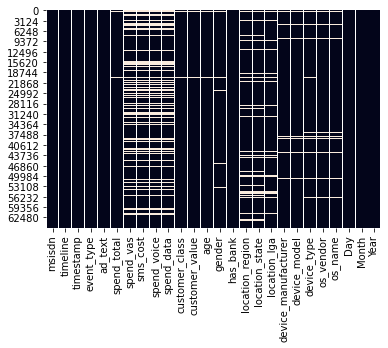

In [28]:
sns.heatmap(installdownload.isnull(), cbar=False)

In [29]:
#Dropping null values.
dropped_null = installdownload.dropna()
dropped_null.isnull().sum()

msisdn                 0
timeline               0
timestamp              0
event_type             0
ad_text                0
spend_total            0
spend_vas              0
sms_cost               0
spend_voice            0
spend_data             0
customer_class         0
customer_value         0
age                    0
gender                 0
has_bank               0
location_region        0
location_state         0
location_lga           0
device_manufacturer    0
device_model           0
device_type            0
os_vendor              0
os_name                0
Day                    0
Month                  0
Year                   0
dtype: int64

In [30]:
dropped_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44186 entries, 0 to 65590
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   msisdn               44186 non-null  object        
 1   timeline             44186 non-null  float64       
 2   timestamp            44186 non-null  datetime64[ns]
 3   event_type           44186 non-null  object        
 4   ad_text              44186 non-null  object        
 5   spend_total          44186 non-null  float64       
 6   spend_vas            44186 non-null  float64       
 7   sms_cost             44186 non-null  float64       
 8   spend_voice          44186 non-null  float64       
 9   spend_data           44186 non-null  float64       
 10  customer_class       44186 non-null  float64       
 11  customer_value       44186 non-null  object        
 12  age                  44186 non-null  float64       
 13  gender               44186 non-

Total entries before dropping null values were 65591, while total values after dropping null values are 43570.

In [31]:
dropped_null_val = validation.dropna()
dropped_null_val.isnull().sum()

msisdn                 0
timeline               0
timestamp              0
ad_text                0
spend_total            0
spend_vas              0
sms_cost               0
spend_voice            0
spend_data             0
customer_class         0
customer_value         0
age                    0
gender                 0
has_bank               0
location_region        0
location_state         0
location_lga           0
device_manufacturer    0
device_model           0
device_type            0
os_vendor              0
os_name                0
Day                    0
Month                  0
Year                   0
dtype: int64

In [32]:
dropped_null_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 1 to 5998
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   msisdn               3959 non-null   object        
 1   timeline             3959 non-null   float64       
 2   timestamp            3959 non-null   datetime64[ns]
 3   ad_text              3959 non-null   object        
 4   spend_total          3959 non-null   float64       
 5   spend_vas            3959 non-null   float64       
 6   sms_cost             3959 non-null   float64       
 7   spend_voice          3959 non-null   float64       
 8   spend_data           3959 non-null   float64       
 9   customer_class       3959 non-null   float64       
 10  customer_value       3959 non-null   object        
 11  age                  3959 non-null   float64       
 12  gender               3959 non-null   object        
 13  has_bank             3959 non-nul

Total entries before dropping null values were 5999, while total values after dropping null values are 3916.

In [33]:
# checking the distinct count for the categorical columns.
print(dropped_null['location_region'].value_counts(),'\n')
print(len(dropped_null['location_region'].value_counts()))

south west       20367
north central     7589
south south       6149
south east        4799
north west        3570
north east        1712
Name: location_region, dtype: int64 

6


In [34]:
print(dropped_null['location_lga'].value_counts())

municipal area council    3502
eti osa                   2585
alimosho                  2054
ikeja                     1117
obio/akpor                 936
                          ... 
ibaji                        1
kaga                         1
birnin magaji/kiyaw          1
guri                         1
jos east                     1
Name: location_lga, Length: 718, dtype: int64


In [35]:
print(dropped_null['location_state'].value_counts(), '\n')
print(len(dropped_null['location_state'].value_counts()))
#This shows all 37 states were accounted for.

lagos          13120
fct             3966
ogun            2769
rivers          2339
delta           1473
oyo             1423
anambra         1418
kaduna          1369
osun            1308
enugu           1190
imo             1008
ondo             995
kano             969
edo              961
abia             812
ekiti            752
kwara            723
plateau          678
kogi             660
nassarawa        538
adamawa          530
benue            525
niger            499
akwa ibom        484
cross river      470
katsina          445
bayelsa          422
ebonyi           371
borno            317
sokoto           301
bauchi           278
taraba           219
kebbi            218
gombe            200
yobe             168
jigawa           144
zamfara          124
Name: location_state, dtype: int64 

37


In [36]:
dropped_null['timeline'].value_counts()

1.561991e+12    7245
1.562597e+12    6668
1.562234e+12    4533
1.562597e+12    4145
1.561990e+12    3993
                ... 
1.560527e+12       2
1.559929e+12       1
1.559834e+12       1
1.559834e+12       1
1.559576e+12       1
Name: timeline, Length: 152, dtype: int64

In [37]:
dropped_null['ad_text'].value_counts()
# I won't be able to use this feature though it seems important because it's better handled as a NLP problem.

Listen to the latest hit songs from favourite artiste on UduX straight from your phone. Start 30days free trial now! Download here            10327
Listen to the latest hit songs from your favorite artists straight from your phone on habari. Download now to get started                      8874
All your favorite songs in just one place! Download UduX to get started                                                                        7918
Listen to the latest hit songs from your favorite artists straight from your phone on Habari! Enjoy the first 7 days free. Start Here          4599
Live your dreams, enjoy great music, watch videos and have great conversations and much more on Habari. Enjoy the first 7 days free.           4198
All your favourite songs in just one place! Download uduX to get started.                                                                      3222
Listen to the latest hit songs from your favourite artists straight from your phone on habari. Download now to g

In [38]:
dropped_null['spend_total'].value_counts(bins = 10)
# more people spent less than a total of 217,217.

(-2172.172, 217217.148]       44101
(217217.148, 434434.297]         57
(434434.297, 651651.445]         18
(651651.445, 868868.594]          3
(1520520.039, 1737737.187]        3
(1086085.742, 1303302.89]         2
(868868.594, 1086085.742]         1
(1954954.336, 2172171.484]        1
(1303302.89, 1520520.039]         0
(1737737.187, 1954954.336]        0
Name: spend_total, dtype: int64

In [39]:
dropped_null['spend_vas'].value_counts(bins = 10)
# more people spent less than 18,054

(-180.546, 18054.5]     44175
(18054.5, 36109.0]          6
(36109.0, 54163.5]          1
(54163.5, 72218.0]          1
(90272.5, 108327.0]         1
(108327.0, 126381.5]        1
(162490.5, 180545.0]        1
(72218.0, 90272.5]          0
(126381.5, 144436.0]        0
(144436.0, 162490.5]        0
Name: spend_vas, dtype: int64

In [40]:
dropped_null['sms_cost'].value_counts(bins = 10)

(-11.838, 1183.7]     43850
(1183.7, 2367.4]        260
(2367.4, 3551.1]         48
(3551.1, 4734.8]         17
(4734.8, 5918.5]          8
(10653.3, 11837.0]        2
(5918.5, 7102.2]          1
(7102.2, 8285.9]          0
(8285.9, 9469.6]          0
(9469.6, 10653.3]         0
Name: sms_cost, dtype: int64

In [41]:
dropped_null['spend_voice'].value_counts(bins = 7)

(-119.141, 17020.006]      43843
(17020.006, 34040.011]       311
(34040.011, 51060.017]        28
(51060.017, 68080.023]         2
(68080.023, 85100.029]         1
(102120.034, 119140.04]        1
(85100.029, 102120.034]        0
Name: spend_voice, dtype: int64

In [42]:
dropped_null['spend_data'].value_counts(bins=7)

(-22.501, 3214.286]       43082
(3214.286, 6428.571]        899
(6428.571, 9642.857]        131
(9642.857, 12857.143]        58
(12857.143, 16071.429]       12
(19285.714, 22500.0]          3
(16071.429, 19285.714]        1
Name: spend_data, dtype: int64

In [43]:
dropped_null['customer_class'].value_counts(bins = 10)

(17.967, 122.2]    40560
(122.2, 225.4]      2772
(328.6, 431.8]       349
(225.4, 328.6]       289
(947.8, 1051.0]      216
(431.8, 535.0]         0
(535.0, 638.2]         0
(638.2, 741.4]         0
(741.4, 844.6]         0
(844.6, 947.8]         0
Name: customer_class, dtype: int64

In [44]:
dropped_null['customer_value'].value_counts()

high         11433
medium       11047
low          10342
very high     6923
top           4441
Name: customer_value, dtype: int64

In [45]:
dropped_null['age'].value_counts(bins = 5)

(3.9850000000000003, 408.8]    44097
(1617.2, 2020.0]                  89
(408.8, 811.6]                     0
(811.6, 1214.4]                    0
(1214.4, 1617.2]                   0
Name: age, dtype: int64

In [46]:
dropped_null['gender'].value_counts()

M    29261
F    14925
Name: gender, dtype: int64

In [47]:
dropped_null['has_bank'].value_counts()

No     41885
Yes     2301
Name: has_bank, dtype: int64

In [48]:
dropped_null['device_manufacturer'].value_counts()

samsung                 12839
tecno                   10980
itel                     5555
infinix                  5117
nokia                    1738
                        ...  
tmobile                     1
sinocom                     1
ipro                        1
option international        1
gtide                       1
Name: device_manufacturer, Length: 360, dtype: int64

In [49]:
dropped_null['device_model'].value_counts()

galaxy j7 prime (smg610f ds)    715
y2                              689
wx3p                            589
spark                           556
galaxy j7 (smj730f ds)          530
                               ... 
c6625                             1
g4 cdma (ls997)                   1
redmi note 4                      1
gb106                             1
iphone 5s (a1528)                 1
Name: device_model, Length: 3323, dtype: int64

In [50]:
dropped_null['device_type'].value_counts()

Smartphone       39144
Feature Phone     5042
Name: device_type, dtype: int64

In [51]:
dropped_null['os_vendor'].value_counts()

google            34910
proprietary os     4582
ds)                1290
apple               844
symbian             460
                  ...  
 p2000                1
mf823d                1
 s786                 1
818d                  1
a76                   1
Name: os_vendor, Length: 181, dtype: int64

In [52]:
dropped_null['os_name'].value_counts()

android                  34132
proprietary os            4601
google                    1674
ios                        844
Android                    778
                         ...  
 rioal00)                    1
tmsm500                      1
t526                         1
 k09                         1
 a8020 smarttabs a705        1
Name: os_name, Length: 115, dtype: int64

### Data Visualization
#### EDA

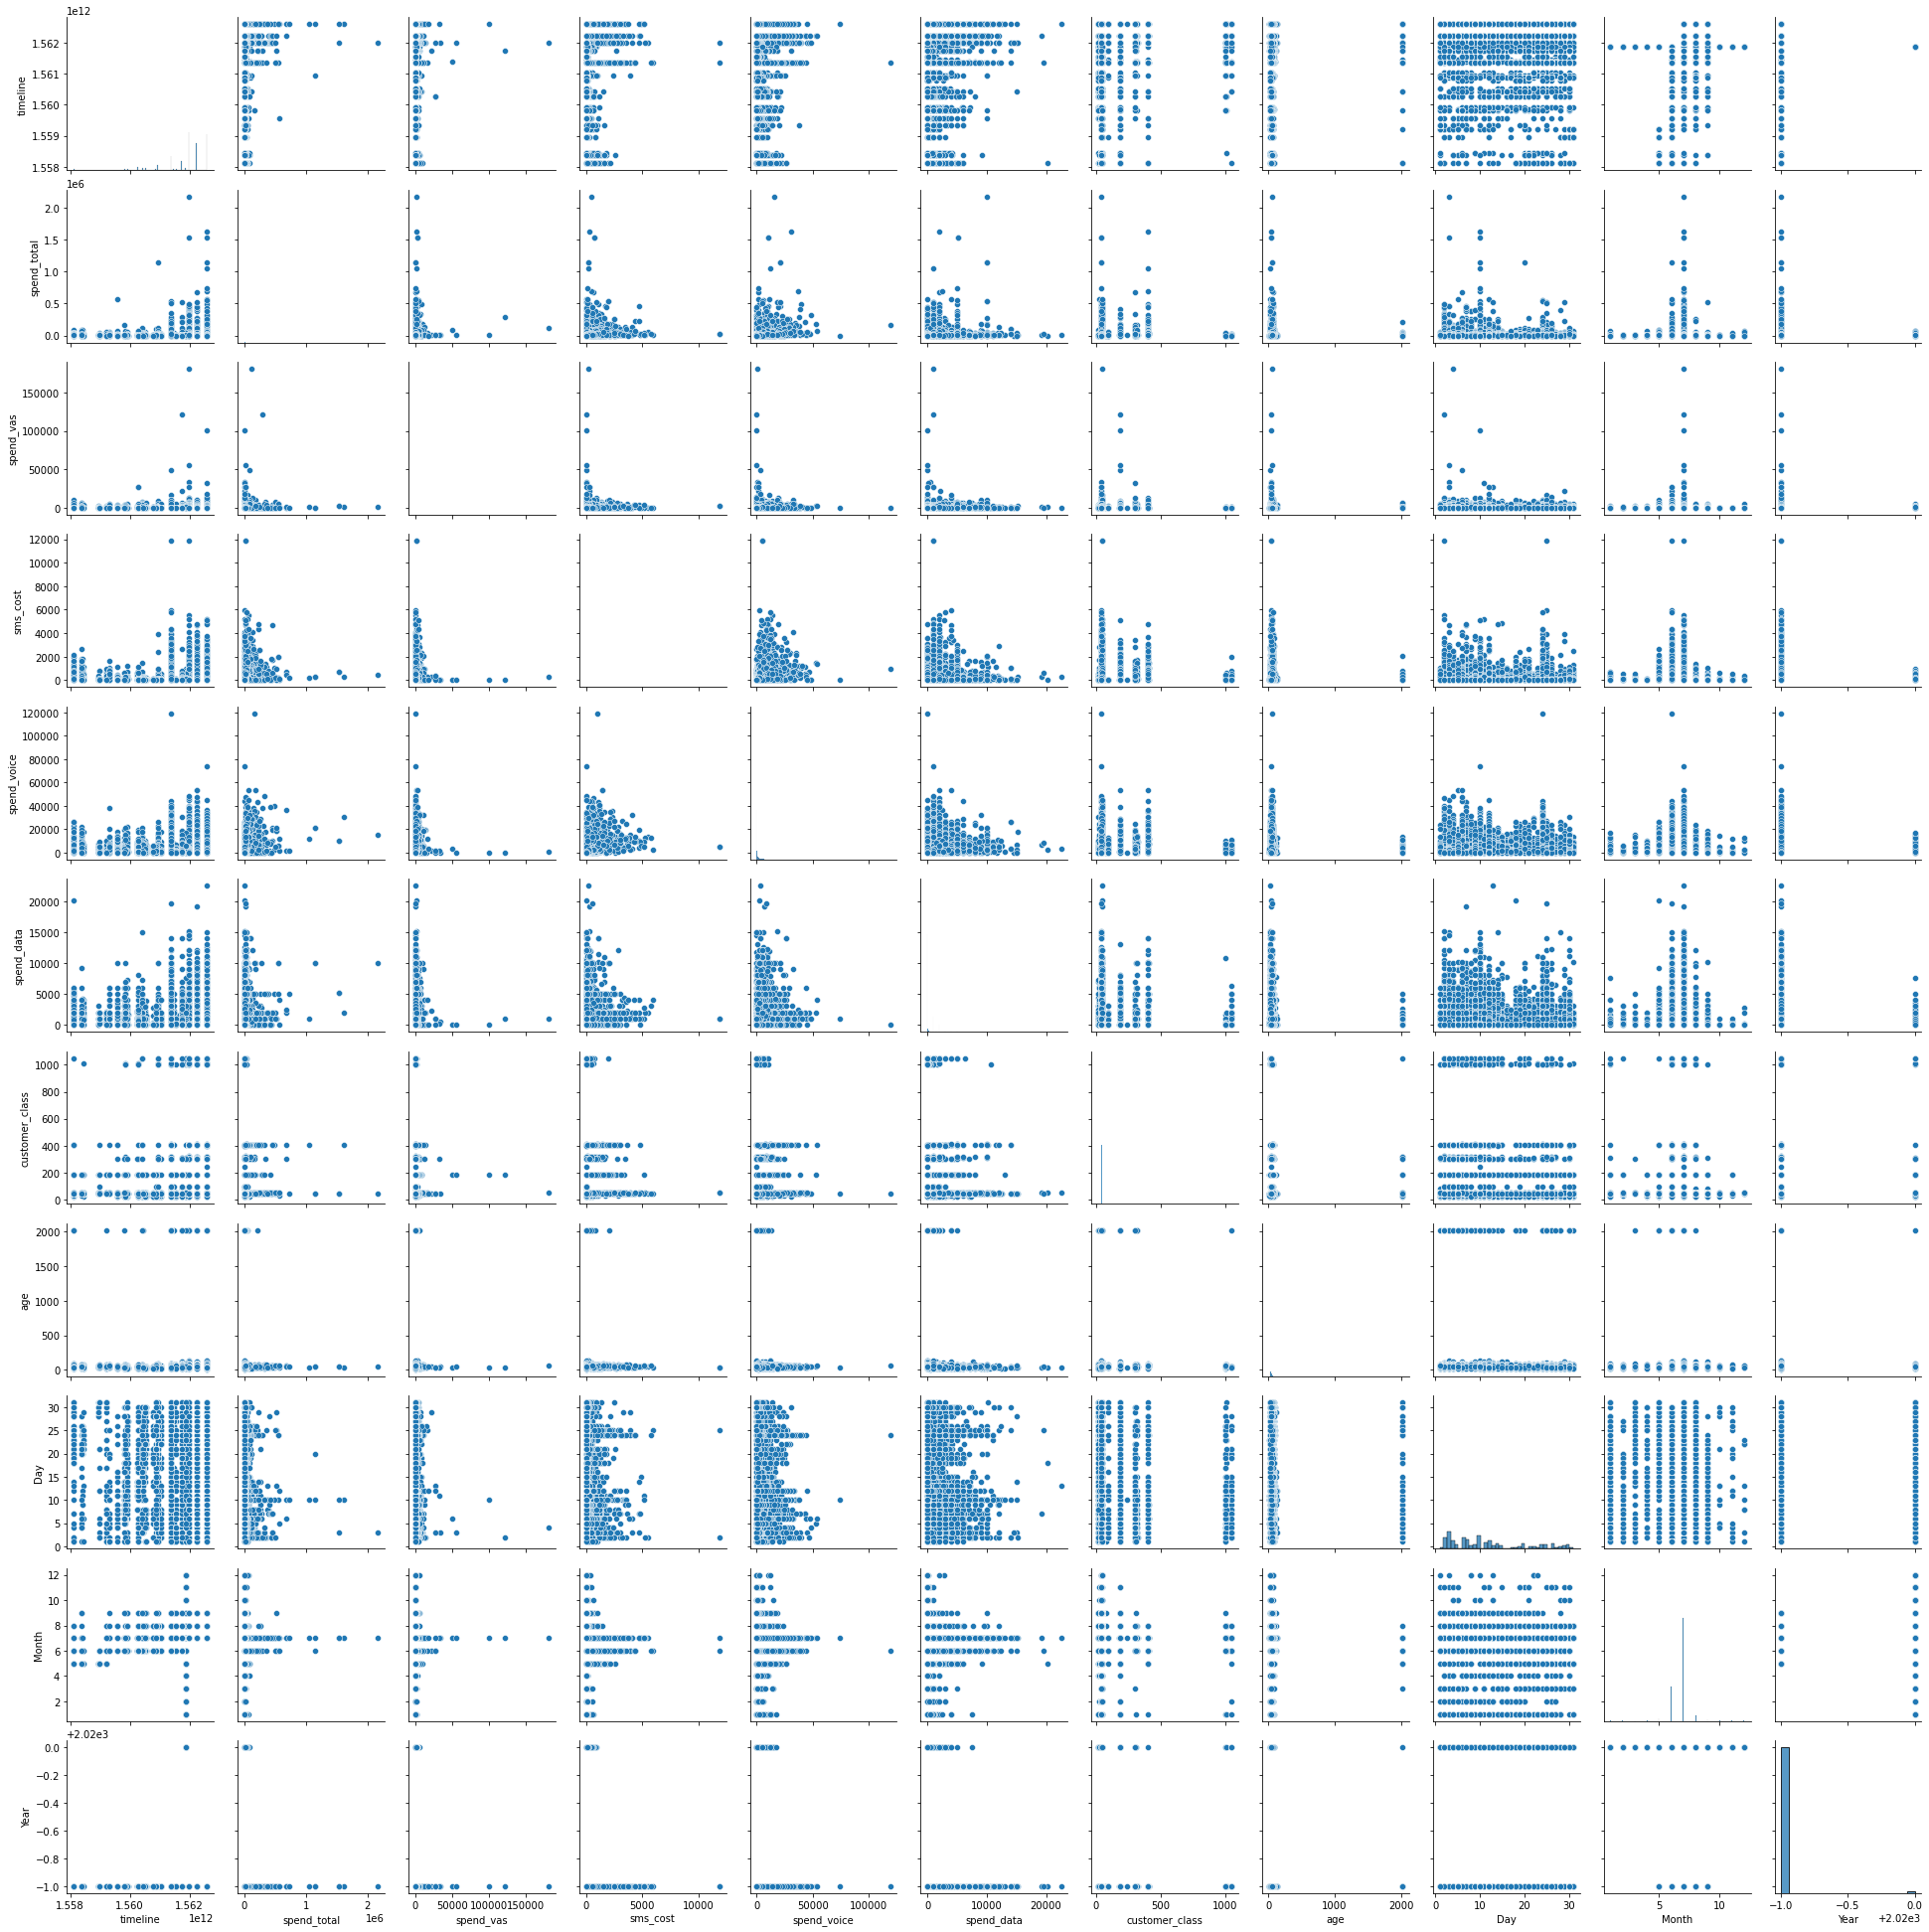

In [53]:
# Bivariate Analysis
# For numerical variables.
sns.pairplot(dropped_null)
plt.show()

The pairplot could only mostly show lack of correlation between the numerical features.

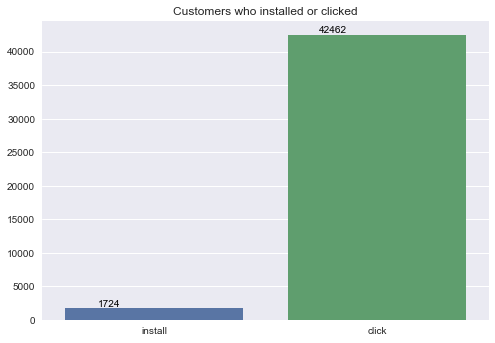

In [54]:
# Univariate Analysis
# For categorical variables.
plt.style.use('seaborn')
c = sns.countplot(x='event_type',  data=dropped_null)

plt.xlabel('')
plt.ylabel('')
plt.title('Customers who installed or clicked')

for k in c.patches:
    c.annotate(f'\n{k.get_height()}', (k.get_x()+0.2, k.get_height()), ha='center', va='bottom', color='black', size=10)
plt.show()

Right from here we can notice that the dataset is not balanced as more customers click than they install.
Considering the number of customers who installed before removing all rows with null values, another method that doesn't involve dropping the rows would have been used by me so the model can predict better.

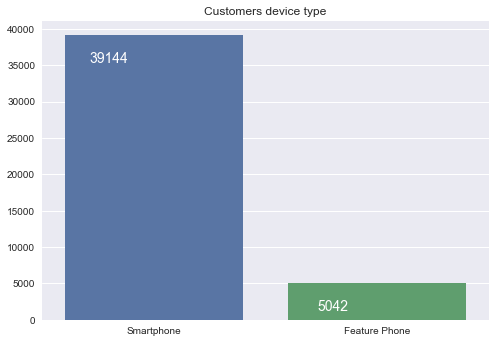

In [55]:
c = sns.countplot(x='device_type',  data=dropped_null)

plt.xlabel('')
plt.ylabel('')
plt.title('Customers device type')

for k in c.patches:
    c.annotate(f'\n{k.get_height()}', (k.get_x()+0.2, k.get_height()), ha='center', va='top', color='white', size=14)
plt.show()

More customers use smartphone, this means campaigns specific to customers using smartphone can be imbibed to gain more converts.

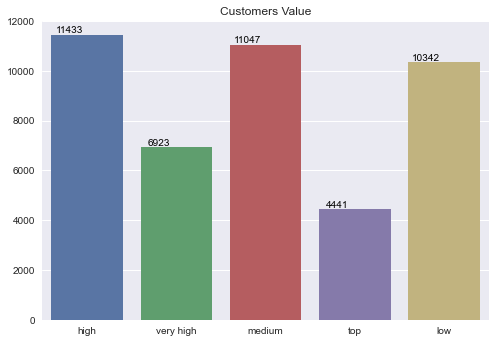

In [56]:
c = sns.countplot(x='customer_value',  data=dropped_null)

plt.xlabel('')
plt.ylabel('')
plt.title('Customers Value')

for k in c.patches:
    c.annotate(f'\n{k.get_height()}', (k.get_x()+0.2, k.get_height()), ha='center', va='bottom', color='black', size=10)
plt.show()

Most customers have high values while customers who have very high values were second to the least set of customers according to customer values.

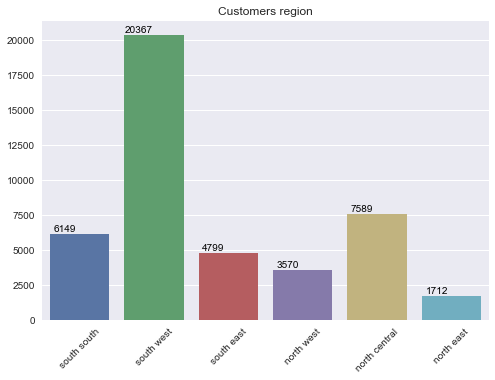

In [57]:
c = sns.countplot(x='location_region',  data=dropped_null)

plt.xlabel('')
plt.ylabel('')
plt.title('Customers region')
plt.xticks(rotation=45)

for k in c.patches:
    c.annotate(f'\n{k.get_height()}', (k.get_x()+0.2, k.get_height()), ha='center', va='bottom', color='black', size=10)
plt.show()

Significantly more customers visit the website from the south west region than from other region.

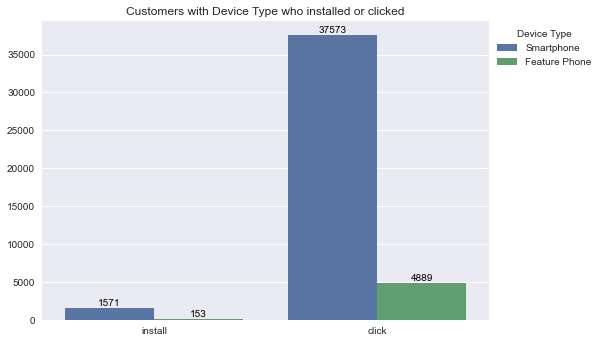

In [58]:
# Bivariate Analysis
# Categorical features
c = sns.countplot(x='event_type',  data=dropped_null, hue='device_type')

plt.xlabel('')
plt.ylabel('')
plt.legend(title = 'Device Type', bbox_to_anchor= (1.25, 1))
plt.title('Customers with Device Type who installed or clicked')

for k in c.patches:
    c.annotate(f'\n{k.get_height()}', (k.get_x()+0.2, k.get_height()), ha='center', va='bottom', color='black', size=10)
plt.show()

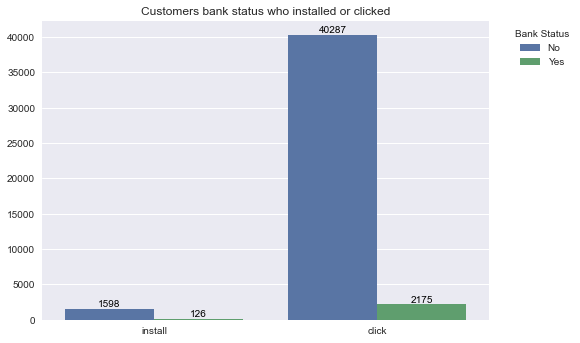

In [59]:
c = sns.countplot(x='event_type',  data=dropped_null, hue='has_bank')

plt.xlabel('')
plt.ylabel('')
plt.legend(title = 'Bank Status', bbox_to_anchor= (1.20, 1))
plt.title('Customers bank status who installed or clicked')

for k in c.patches:
    c.annotate(f'\n{k.get_height()}', (k.get_x()+0.2, k.get_height()), ha='center', va='bottom', color='black', size=10)
plt.show()

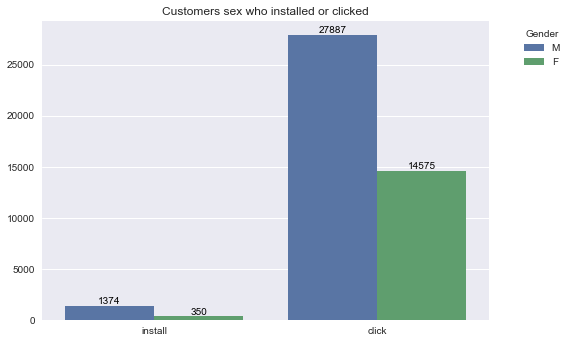

In [60]:
c = sns.countplot(x='event_type',  data=dropped_null, hue='gender')

plt.xlabel('')
plt.ylabel('')
plt.legend(title = 'Gender', bbox_to_anchor= (1.18, 1))
plt.title('Customers sex who installed or clicked')

for k in c.patches:
    c.annotate(f'\n{k.get_height()}', (k.get_x()+0.2, k.get_height()), ha='center', va='bottom', color='black', size=10)
plt.show()

More male both installed and clicked. More male visit site, therefore this is likely the reason as to this result.

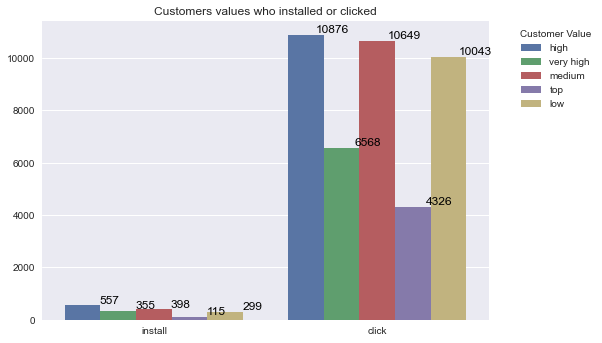

In [61]:
c = sns.countplot(x='event_type',  data=dropped_null, hue='customer_value')

plt.xlabel('')
plt.ylabel('')
plt.legend(title = 'Customer Value', bbox_to_anchor= (1.05, 1))
plt.title('Customers values who installed or clicked')

for k in c.patches:
    c.annotate(f'\n{k.get_height()}', (k.get_x()+0.2, k.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

Customers with very high values didn't convert as much as customers with high values.

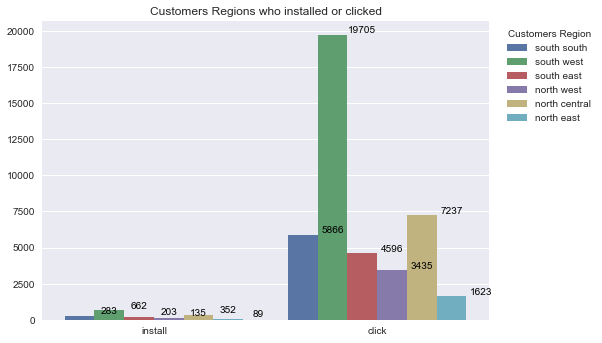

In [62]:
c = sns.countplot(x='event_type',  data=dropped_null, hue='location_region')

plt.xlabel('')
plt.ylabel('')
plt.legend(title = 'Customers Region', bbox_to_anchor= (1.25, 1))
plt.title('Customers Regions who installed or clicked')

for k in c.patches:
    c.annotate(f'\n{k.get_height()}', (k.get_x()+0.2, k.get_height()), ha='center', va='bottom', color='black', size=10)
plt.show()

The region that had the highest number of customers who installed is the south west region, this may also be due to the fact that south west region had the highest number of customers also.

#### Model Building

In [63]:
# transforming the target variable
dropped_null['event_type'] = dropped_null['event_type'].replace(('click','install'), (0,1))

<ipython-input-63-25aa4cb3853a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_null['event_type'] = dropped_null['event_type'].replace(('click','install'), (0,1))


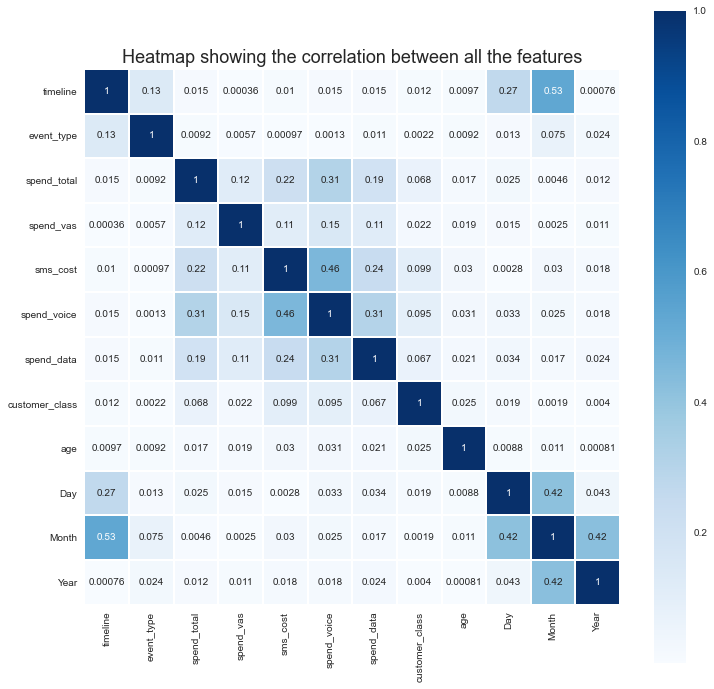

In [64]:
corr = dropped_null.corr().abs()

plt.figure(figsize=(12, 12))
cmap = "Blues"
annot = True
linewidths=1
sns.heatmap(corr, annot=annot, cmap=cmap, linewidths=linewidths, square=True)
plt.title('Heatmap showing the correlation between all the features', fontsize=18)
plt.show()

In [65]:
corr_1 = corr.unstack()
corr_2 = corr_1.sort_values(kind="quicksort", ascending=False)

In [66]:
corr_2[(corr_2 <= 0.5) & (corr_2 >= 0.1)]

spend_voice  sms_cost       0.458291
sms_cost     spend_voice    0.458291
Year         Month          0.424936
Month        Year           0.424936
Day          Month          0.416960
Month        Day            0.416960
spend_total  spend_voice    0.310821
spend_voice  spend_total    0.310821
spend_data   spend_voice    0.306966
spend_voice  spend_data     0.306966
Day          timeline       0.267935
timeline     Day            0.267935
sms_cost     spend_data     0.239394
spend_data   sms_cost       0.239394
spend_total  sms_cost       0.215424
sms_cost     spend_total    0.215424
spend_data   spend_total    0.193636
spend_total  spend_data     0.193636
spend_voice  spend_vas      0.149809
spend_vas    spend_voice    0.149809
timeline     event_type     0.134017
event_type   timeline       0.134017
spend_vas    spend_total    0.115047
spend_total  spend_vas      0.115047
spend_data   spend_vas      0.114422
spend_vas    spend_data     0.114422
             sms_cost       0.112698
s

In [67]:
# feature selection
# I removed features like because they were weak on the correlation table and I removed `msisdn` because it's an identifier and it adds no value also.
X = dropped_null.drop(['msisdn','event_type', 'ad_text', 'timeline'], axis=1)
y = dropped_null['event_type'] # check if timeline will work

In [68]:
# I removed the same features for the validation set also.
validation_set = dropped_null_val.drop(['msisdn', 'ad_text', 'timeline'], axis=1)
validation_msi = dropped_null_val['msisdn']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=150) 

In [70]:
# I used standard scaler and one hot encoder on the numerical features and one hot encoder on the categorical variables
def pipeline_transformer(data):
    cat_cols = list(data.select_dtypes(include=['O']).columns)
    num_cols = list(data.select_dtypes(include=['number']).columns)
    
    num_pipe_1 = make_pipeline(StandardScaler())

    column_transformer = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_cols),
                                      ("num_transform", num_pipe_1, num_cols),
                                    ])
    
    return column_transformer

In [71]:
# Using the function created above on the training dataset alone, this would be used for all models.
features_test = pipeline_transformer(X_train)
x_train_prepared = features_test.fit_transform(X_train)
x_test_prepared = features_test.transform(X_test)

In [72]:
# Using the function created on the validation set, this would be used on the model that performs better than the rest. 
features_test = pipeline_transformer(X)
train_prepared = features_test.fit_transform(X)
val_prepared = features_test.transform(validation_set)

In [73]:
x_train_prepared

<35348x4404 sparse matrix of type '<class 'numpy.float64'>'
	with 742308 stored elements in Compressed Sparse Row format>

#### Random Forest Classifier Model

In [74]:
#oob_score=True,
rcm = RandomForestClassifier(n_estimators=100,  random_state = 2)
rcm.fit(x_train_prepared, y_train)

RandomForestClassifier(random_state=2)

In [75]:
ry_pred = rcm.predict(x_test_prepared)
cmr = confusion_matrix(y_test, ry_pred)
print(cmr, '\n')
accuracy_score(y_test, ry_pred) 

[[8356  136]
 [ 346    0]] 



0.9454627743833447

#### Logistic Regression

In [76]:
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train_prepared, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [77]:
logreg_pred = logreg.predict(x_test_prepared)
cmr = confusion_matrix(y_test, logreg_pred)
print(cmr, '\n')
accuracy_score(y_test, logreg_pred)

[[8488    4]
 [ 341    5]] 



0.9609640190088256

#### Decision Tree Classifier Model

In [78]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(x_train_prepared, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [79]:
dy_pred = dtc.predict(x_test_prepared)
cmd = confusion_matrix(y_test, dy_pred)
print(cmd)
accuracy_score(y_test, dy_pred)

[[8197  295]
 [ 332   14]]


0.9290563475899525

#### SVC

In [80]:
svc = SVC()
svc.fit(x_train_prepared, y_train)

SVC()

In [81]:
sy_pred = svc.predict(x_test_prepared)
cms = confusion_matrix(y_test, sy_pred)
print(cms)
accuracy_score(y_test, sy_pred)

[[8492    0]
 [ 346    0]]


0.9608508712378366

### Classification Report of all models

In [82]:
print("Random Forest Classifier Classification Report\n")
print(classification_report(y_test, ry_pred))

Random Forest Classifier Classification Report

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8492
           1       0.00      0.00      0.00       346

    accuracy                           0.95      8838
   macro avg       0.48      0.49      0.49      8838
weighted avg       0.92      0.95      0.93      8838



In [83]:
print("Logistic Regression Classification Report\n")
print(classification_report(y_test, logreg_pred))

Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8492
           1       0.56      0.01      0.03       346

    accuracy                           0.96      8838
   macro avg       0.76      0.51      0.50      8838
weighted avg       0.95      0.96      0.94      8838



In [84]:
print("Decision Tree Classifier Classification Report\n")
print(classification_report(y_test, dy_pred))

Decision Tree Classifier Classification Report

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      8492
           1       0.05      0.04      0.04       346

    accuracy                           0.93      8838
   macro avg       0.50      0.50      0.50      8838
weighted avg       0.93      0.93      0.93      8838



In [85]:
print("SVC Classification Report\n")
print(classification_report(y_test, sy_pred))

SVC Classification Report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8492
           1       0.00      0.00      0.00       346

    accuracy                           0.96      8838
   macro avg       0.48      0.50      0.49      8838
weighted avg       0.92      0.96      0.94      8838



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


While the models performed well for 'click', which is the class 0, they performed poorly for 'install', class 1, this is also due to the fact that the dataset isn't balanced. Decision Tree Classifier model and Logistic Regression model performed better than them all by predicting more class 1.

### ROC Curve for the Models

In [86]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, ry_pred[:], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, logreg_pred[:], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, dy_pred[:], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, sy_pred[:], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [87]:
# auc scores
auc_score = roc_auc_score(y_test, ry_pred)
auc_score_2 = roc_auc_score(y_test, logreg_pred)
auc_score_3 = roc_auc_score(y_test, dy_pred)
auc_score_4 = roc_auc_score(y_test, sy_pred)

In [88]:
print("Random Forest Classifier's AUC score: ",auc_score)
print("Logistic Regression's AUC score: ",auc_score_2)
print("Decision Tree Classifier's AUC score: ",auc_score_3)
print("SVC's AUC score: ",auc_score_4)

Random Forest Classifier's AUC score:  0.49199246349505416
Logistic Regression's AUC score:  0.5069899177464544
Decision Tree Classifier's AUC score:  0.5028619251304866
SVC's AUC score:  0.5


#### Validation set

In [89]:
logreg2 = LogisticRegression(random_state=0)
logreg2.fit(train_prepared, y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [90]:
logreg_pred2 = logreg2.predict(val_prepared)

In [91]:
probability = logreg2.predict_proba(val_prepared)[:, 1]

In [92]:
probability

array([0.09973099, 0.07123723, 0.04803317, ..., 0.01645643, 0.00950279,
       0.05752611])

In [93]:
submission = pd.DataFrame(validation_msi, columns = ['msisdn'])

In [94]:
probability = probability.tolist() 
submission ['probability'] = probability

In [97]:
result = logreg_pred2.tolist() 
submission ['result'] = result

In [98]:
submission.head()

,msisdn,probability,result
1,0f1d98624ee2d09f0ef2f8cb8e782507,0.099731,0
4,6338fc13c44fad7de8cfb6e7259a2c75,0.071237,0
5,58119a3dbe79ebf01957315e3f5ea164,0.048033,0
6,0f47b078a3d1add47203e8975b9a383d,0.045012,0
7,66a45b3c5b4299acdf6ebbf613517172,0.037078,0


### Summary and Conclusions

The model performed fairly well as it predicted more customers who clicked than customers who installed. It couldn't accurately predict more customers who are likely to convert. The AUC score was very low.

To improve this model, I'd firstly replace the null values rather than dropping them, oversample the dataset, and build the models again.

## Task b

### Data Preparation and Exploration

In [99]:
general_population.columns.symmetric_difference(installsandownload.columns)

Index(['ad_text', 'event_type', 'timeline', 'timestamp'], dtype='object')

In [100]:
general_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   msisdn               500000 non-null  object 
 1   spend_total          500000 non-null  float64
 2   spend_vas            500000 non-null  float64
 3   sms_cost             500000 non-null  float64
 4   spend_voice          500000 non-null  float64
 5   spend_data           500000 non-null  float64
 6   customer_class       500000 non-null  float64
 7   customer_value       500000 non-null  object 
 8   age                  500000 non-null  int64  
 9   gender               495652 non-null  object 
 10  has_bank             500000 non-null  object 
 11  location_region      456052 non-null  object 
 12  location_state       456052 non-null  object 
 13  location_lga         482636 non-null  object 
 14  device_manufacturer  488277 non-null  object 
 15  device_model     

In [101]:
general_population.isnull().sum()

msisdn                     0
spend_total                0
spend_vas                  0
sms_cost                   0
spend_voice                0
spend_data                 0
customer_class             0
customer_value             0
age                        0
gender                  4348
has_bank                   0
location_region        43948
location_state         43948
location_lga           17364
device_manufacturer    11723
device_model           11839
device_type            19293
os_vendor              19014
os_name                19015
dtype: int64

In [102]:
installsandownload.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27564 entries, 0 to 27563
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   msisdn               27564 non-null  object 
 1   timeline             13513 non-null  float64
 2   timestamp            27561 non-null  object 
 3   event_type           27564 non-null  object 
 4   ad_text              27480 non-null  object 
 5   spend_total          27425 non-null  float64
 6   spend_vas            23880 non-null  float64
 7   sms_cost             23880 non-null  float64
 8   spend_voice          23880 non-null  float64
 9   spend_data           23880 non-null  float64
 10  customer_class       27425 non-null  float64
 11  customer_value       27425 non-null  object 
 12  age                  27483 non-null  float64
 13  gender               27287 non-null  object 
 14  has_bank             27540 non-null  object 
 15  location_region      25766 non-null 

In [103]:
installsandownload.isnull().sum()

msisdn                     0
timeline               14051
timestamp                  3
event_type                 0
ad_text                   84
spend_total              139
spend_vas               3684
sms_cost                3684
spend_voice             3684
spend_data              3684
customer_class           139
customer_value           139
age                       81
gender                   277
has_bank                  24
location_region         1798
location_state          1798
location_lga            1556
device_manufacturer      369
device_model             414
device_type              555
os_vendor                448
os_name                  446
dtype: int64

In [104]:
# Transforming the timestamp column.
installsandownload['timestamp']

0          2019-07-07T07:59:40.000Z
1        2019-05-30T13:34:58.000000
2           2019-09-20T07:09:18.408
3          2019-07-07T10:46:07.000Z
4           2019-09-17T13:36:03.466
                    ...            
27559      2019-09-23T05:42:01.000Z
27560       2020-03-24T08:59:07.153
27561      2019-09-09T14:09:44.000Z
27562       2020-03-23T07:33:41.784
27563       2020-06-29T11:25:14.157
Name: timestamp, Length: 27564, dtype: object

In [105]:
installsandownload['timestamp'].value_counts()

2020-05-23T16:31:26.759     72
2020-05-23T16:31:21.822     72
2019-06-16T10:39:43.000Z    13
2019-06-24T15:05:41.000Z     8
2019-06-18T09:05:51.000Z     8
                            ..
2020-03-24T06:44:16.849      1
2020-06-29T12:01:15.443      1
2019-09-12T09:11:24.585      1
2020-03-14T09:57:26.382      1
2019-06-25T13:29:54.000Z     1
Name: timestamp, Length: 27069, dtype: int64

In [106]:
# I decided to fill the null values with the highest occurence of timestamp
installsandownload['timestamp'] = installsandownload['timestamp'].fillna('2020-05-23T16:31:21.822')

In [107]:
installsandownload['timestamp'] = installsandownload['timestamp'].str.replace('T', ' ')
installsandownload['timestamp'] = installsandownload['timestamp'].str.split('.').str[0]
installsandownload['timestamp'] = installsandownload['timestamp'].str.split(',').str[0]

installsandownload['timestamp'].value_counts() 

2020-05-23 16:31:21    75
2020-05-23 16:31:26    72
2020-06-02 16:02:04    22
2020-01-25 19:51:45    16
2020-01-25 19:51:46    13
                       ..
2019-07-04 13:13:29     1
2020-06-23 13:27:00     1
2019-06-25 14:31:53     1
2019-06-07 11:08:52     1
2020-03-25 14:51:12     1
Name: timestamp, Length: 22276, dtype: int64

In [108]:
installsandownload['timestamp'] = pd.to_datetime(installsandownload['timestamp'].astype(str), format='%Y-%m-%d %H:%M:%S') 
installsandownload['timestamp']

0       2019-07-07 07:59:40
1       2019-05-30 13:34:58
2       2019-09-20 07:09:18
3       2019-07-07 10:46:07
4       2019-09-17 13:36:03
                ...        
27559   2019-09-23 05:42:01
27560   2020-03-24 08:59:07
27561   2019-09-09 14:09:44
27562   2020-03-23 07:33:41
27563   2020-06-29 11:25:14
Name: timestamp, Length: 27564, dtype: datetime64[ns]

In [109]:
# Extracting the day, month and year from the timestamp model for customer segmentation.
installsandownload['Day'] = installsandownload['timestamp'].dt.day
installsandownload['Month'] = installsandownload['timestamp'].dt.month
installsandownload['Year'] = installsandownload['timestamp'].dt.year

In [110]:
installsandownload['Month'].value_counts()

7     8298
9     7583
6     3920
3     3025
1     1280
8     1261
5     1041
4      564
2      245
12     165
10     146
11      36
Name: Month, dtype: int64

In [111]:
installsandownload['Year'].value_counts()

2019    18575
2020     8989
Name: Year, dtype: int64

In [112]:
installsandownload['Day'].value_counts(bins=10)

(0.969, 4.0]    6202
(19.0, 22.0]    3599
(16.0, 19.0]    3445
(25.0, 28.0]    3025
(4.0, 7.0]      2974
(22.0, 25.0]    2392
(10.0, 13.0]    1878
(13.0, 16.0]    1530
(7.0, 10.0]     1378
(28.0, 31.0]    1141
Name: Day, dtype: int64

There are more customers between the 1st and 4th of each month and the 19th and 22nd of each month.

In [113]:
installsandownload['spend_total'].value_counts(bins=10)

(-400.57399999999996, 40057.312]    27159
(40057.312, 80114.624]                196
(80114.624, 120171.936]                42
(120171.936, 160229.248]               13
(160229.248, 200286.56]                 6
(200286.56, 240343.871]                 3
(280401.183, 320458.495]                2
(320458.495, 360515.807]                2
(360515.807, 400573.119]                2
(240343.871, 280401.183]                0
Name: spend_total, dtype: int64

More customers spend below 40,057.

<AxesSubplot:>

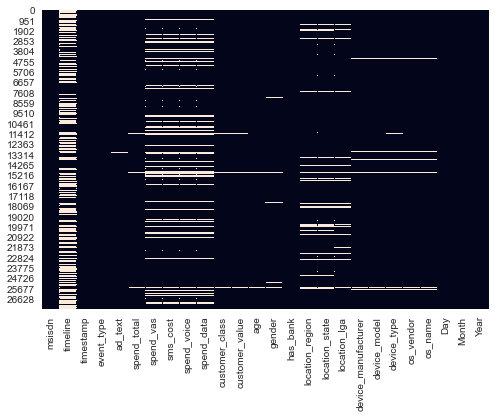

In [115]:
# looking the total null values visually
sns.heatmap(installsandownload.isnull(), cbar=False)

In [116]:
installsandownload['gender'].value_counts() #277

M    21329
F     5958
Name: gender, dtype: int64

In [117]:
installsandownload['event_type'].value_counts()

install                     17393
af_app_opened                6837
af_complete_registration     3334
Name: event_type, dtype: int64

In [118]:
byregion = installsandownload.groupby('location_region')

In [119]:
byregion.count().transpose()

location_region,north central,north east,north west,south east,south south,south west
msisdn,4284,607,1919,2142,3385,13429
timeline,1951,370,920,1320,1706,6331
timestamp,4284,607,1919,2142,3385,13429
event_type,4284,607,1919,2142,3385,13429
ad_text,4270,606,1913,2137,3368,13398
spend_total,4282,607,1919,2142,3385,13373
spend_vas,3811,454,1729,1706,2977,11750
sms_cost,3811,454,1729,1706,2977,11750
spend_voice,3811,454,1729,1706,2977,11750
spend_data,3811,454,1729,1706,2977,11750


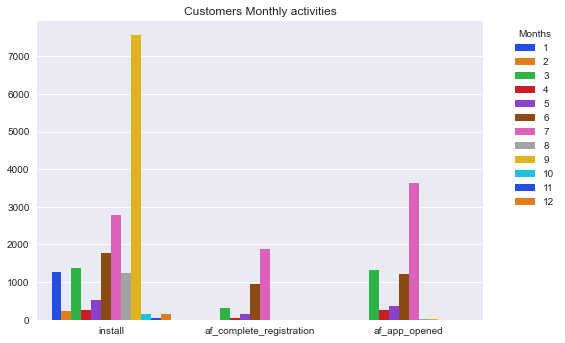

In [120]:
# EDA
# Bivariate
c = sns.countplot(x='event_type',  data=installsandownload, hue='Month', palette='bright')

plt.xlabel('')
plt.ylabel('')
plt.legend(title = 'Months', bbox_to_anchor= (1.18, 1))
plt.title('Customers Monthly activities')


plt.show()

More customers install in the month of September, more customers complete registration and open app in the month of July.
The more active months are January, March, June, July and September.

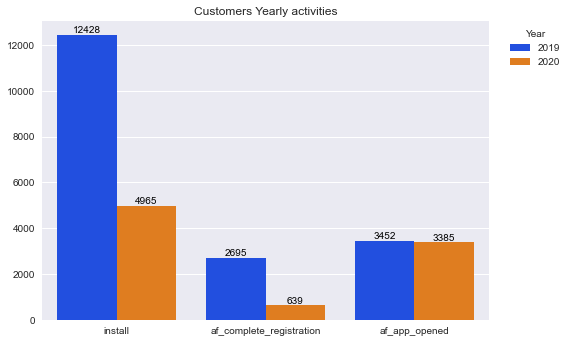

In [121]:
c = sns.countplot(x='event_type',  data=installsandownload, hue='Year', palette='bright')

plt.xlabel('')
plt.ylabel('')
plt.legend(title = 'Year', bbox_to_anchor= (1.18, 1))
plt.title('Customers Yearly activities')


for k in c.patches:
    c.annotate(f'\n{k.get_height()}', (k.get_x()+0.2, k.get_height()), ha='center', va='bottom', color='black', size=10)
    
plt.show()

More customers installed in 2019 compared to 2020, more customers completed registration in the year 2019 and more customers opened app in the year 2019 also although it's difference is minimal compared to the year 2020.

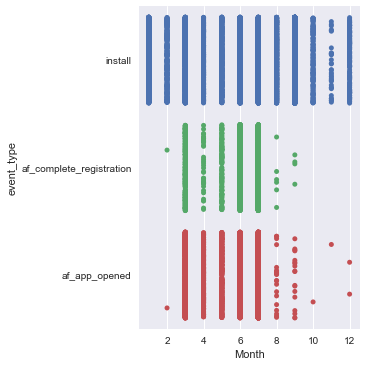

In [122]:
sns.catplot(x='Month', y='event_type', 
            data = installsandownload,
            jitter = '0.40')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

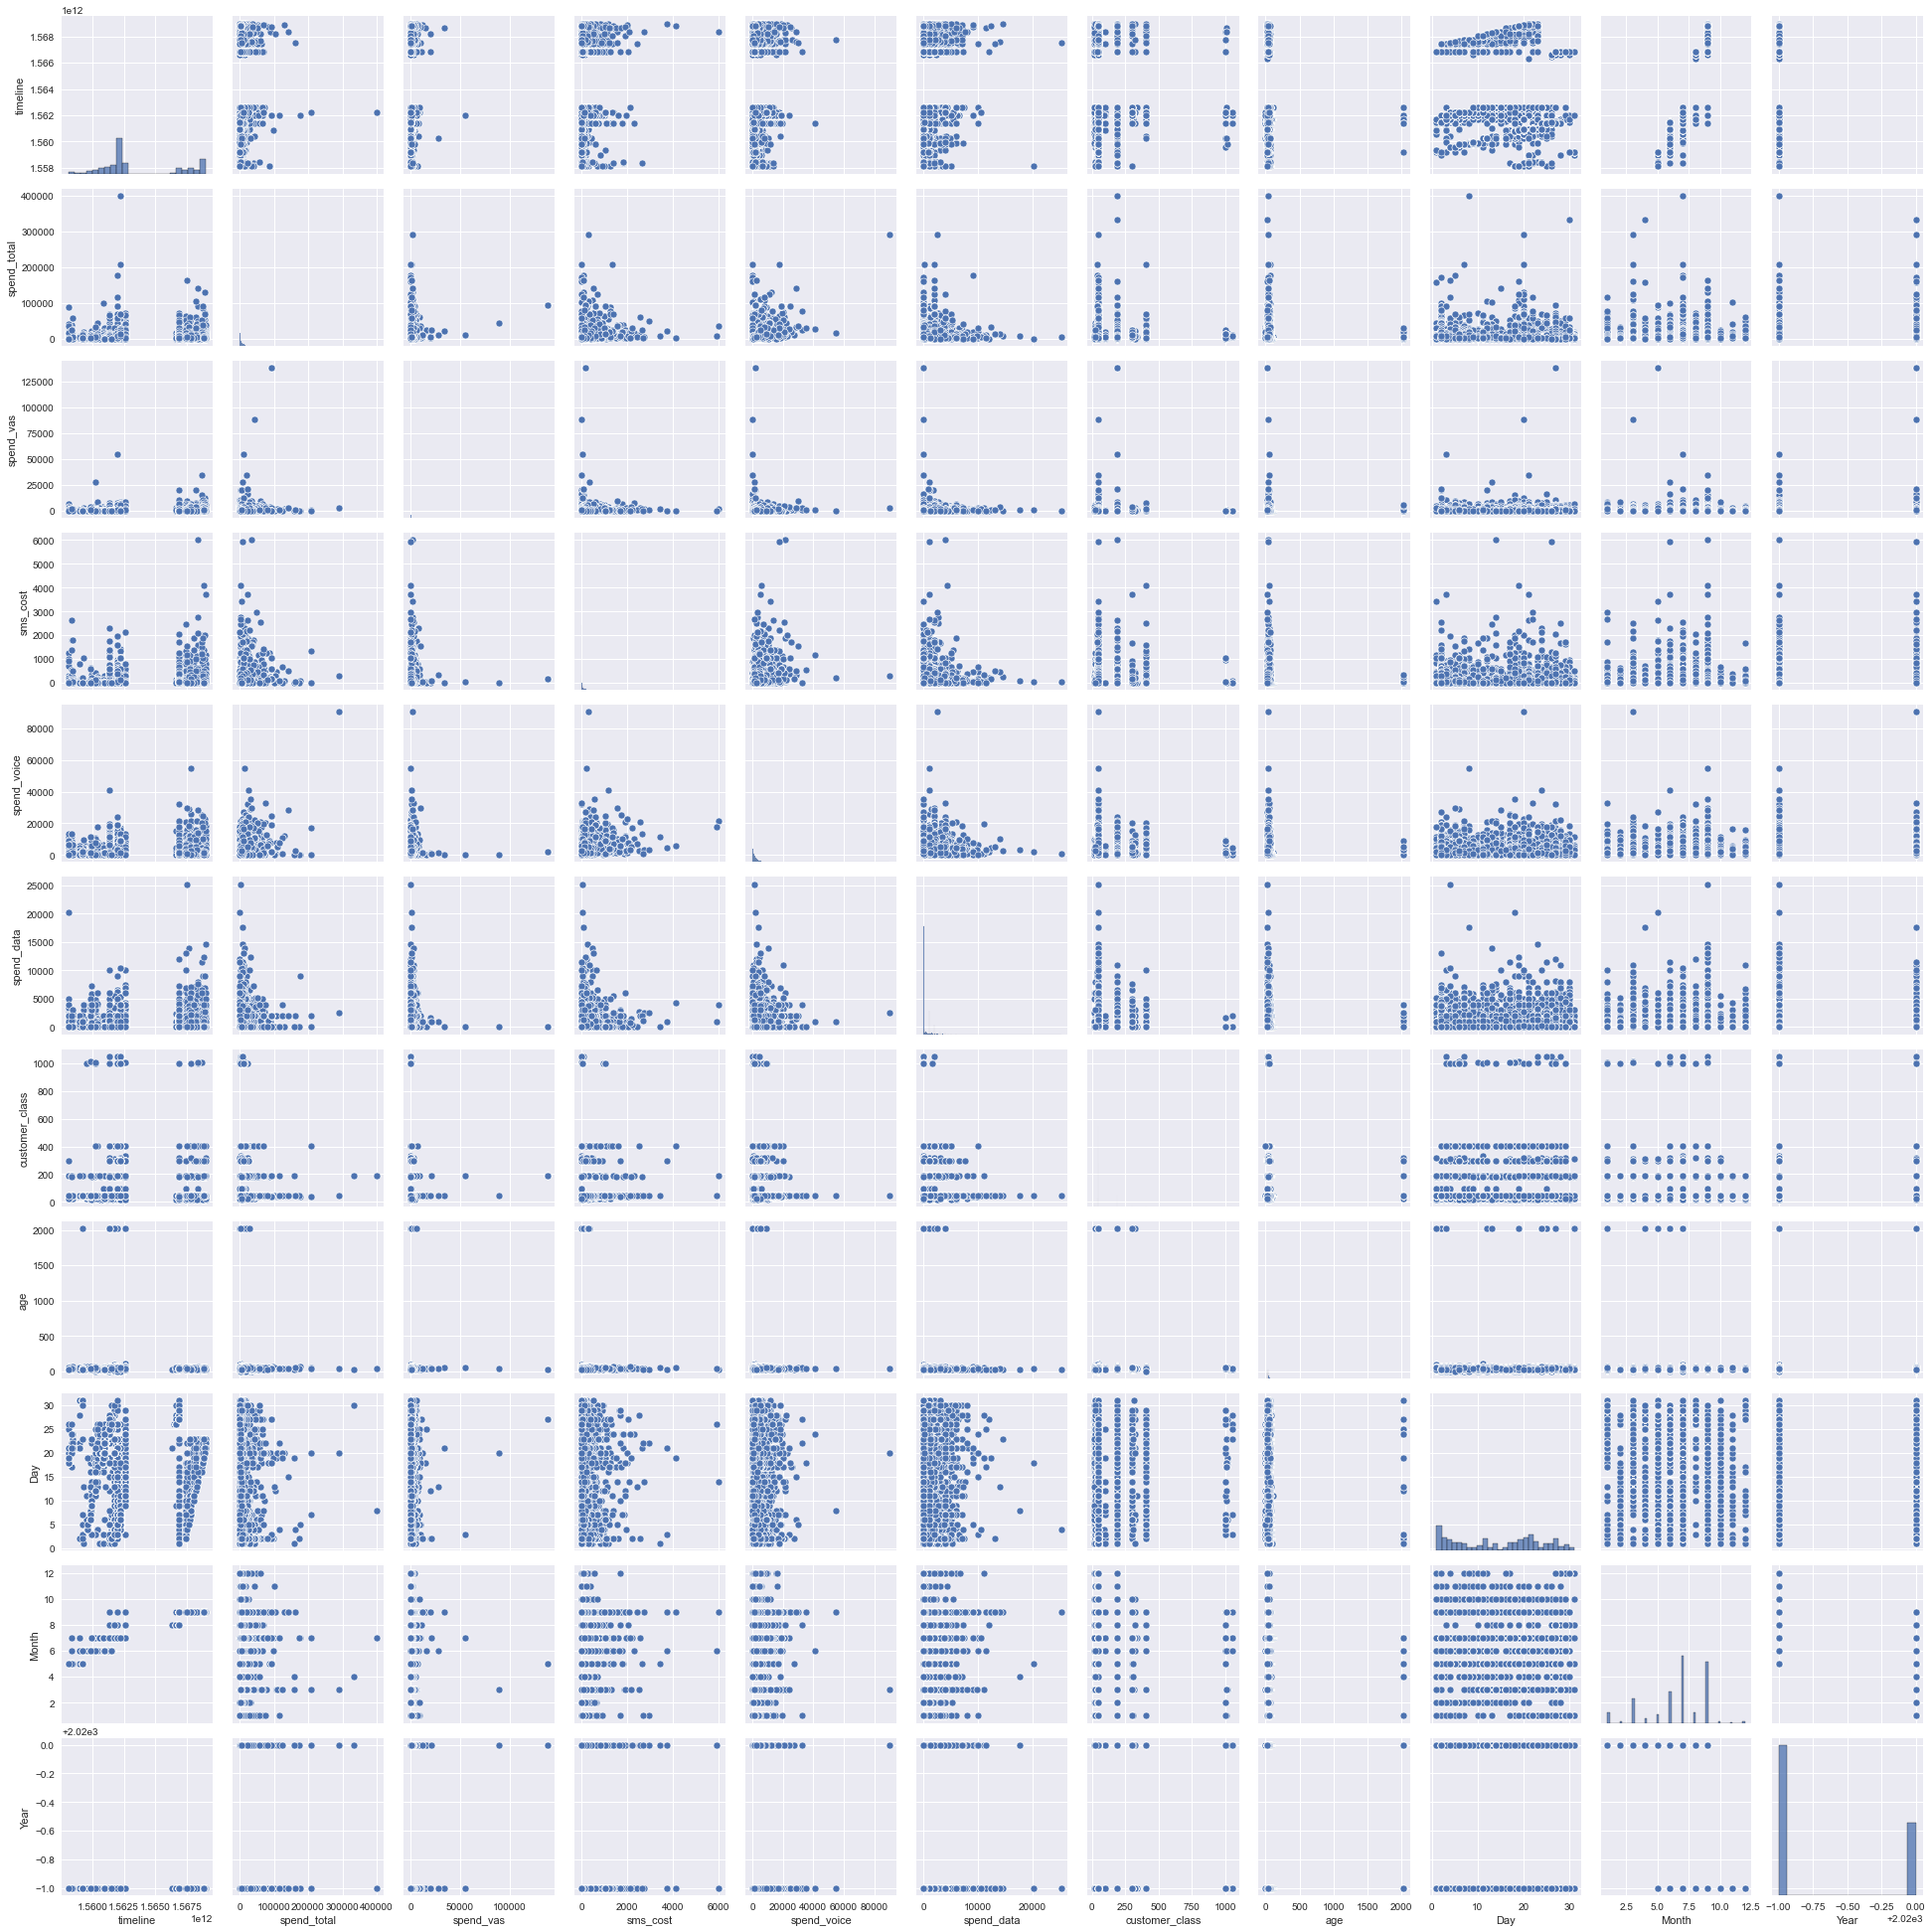

In [123]:
sns.pairplot(installsandownload)
plt.show

In [124]:
installsandownload['spend_total']=installsandownload['spend_total'].fillna(installsandownload['spend_total'].mean())

In [125]:
# I dropped the timeline column because it had the highest null values.
# I dropped ad_text because it's best with an NLP model and 'msisdn' because it isn't needed. 
# I dropped timestamp because I had extracted day, month and year from it.
installsandownload.drop(['timeline', 'ad_text', 'msisdn', 'timestamp'], inplace=True, axis=1) 

In [126]:
cus_segmentation = installsandownload.dropna()

In [127]:
cus_segmentation.info() # 27564 entries before dropping null values, 21,834 entries after dropping null values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21834 entries, 0 to 27563
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_type           21834 non-null  object 
 1   spend_total          21834 non-null  float64
 2   spend_vas            21834 non-null  float64
 3   sms_cost             21834 non-null  float64
 4   spend_voice          21834 non-null  float64
 5   spend_data           21834 non-null  float64
 6   customer_class       21834 non-null  float64
 7   customer_value       21834 non-null  object 
 8   age                  21834 non-null  float64
 9   gender               21834 non-null  object 
 10  has_bank             21834 non-null  object 
 11  location_region      21834 non-null  object 
 12  location_state       21834 non-null  object 
 13  location_lga         21834 non-null  object 
 14  device_manufacturer  21834 non-null  object 
 15  device_model         21834 non-null 

In [128]:
# standardizing the all numerical features
num_feat = ['Day', 'Month', 'Year',  'age', 'customer_class', 'spend_data', 'spend_voice', 'sms_cost', 'spend_vas', 'spend_total']
scaler = StandardScaler()
cus_segmentation[num_feat] = scaler.fit_transform(cus_segmentation[num_feat])

<ipython-input-128-29ab42a25691>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_segmentation[num_feat] = scaler.fit_transform(cus_segmentation[num_feat])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [131]:
from sklearn.preprocessing import OrdinalEncoder

In [135]:
oe = OrdinalEncoder()
cat_feat = ['event_type','customer_value','gender', 'has_bank', 'location_region', 'location_state','location_lga', 'device_manufacturer', 'device_model', 'device_type','os_vendor', 'os_name']
cus_segmentation[cat_feat] = oe.fit_transform(cus_segmentation[cat_feat])

<ipython-input-135-6a1dc7c865ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_segmentation[cat_feat] = oe.fit_transform(cus_segmentation[cat_feat])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [136]:
#create a copy of the data variable
x = cus_segmentation.copy()
# The number in the brackets is K, or the number of clusters we are aiming for, here we take 3 randomly
kmeans = KMeans(3)
# Fit the data
kmeans.fit(x)
# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'spend voice')

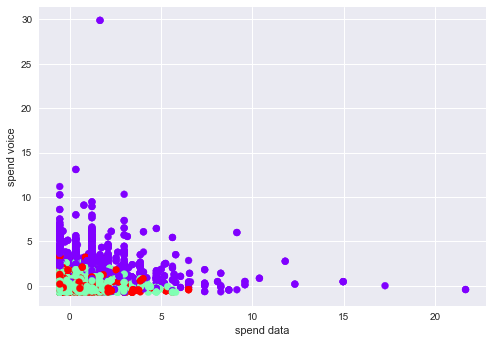

In [173]:
plt.scatter(clusters['spend_data'],clusters['spend_voice'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('spend data')
plt.ylabel('spend voice')

Text(0, 0.5, 'within Clusters Sum of Squares(WCSS)')

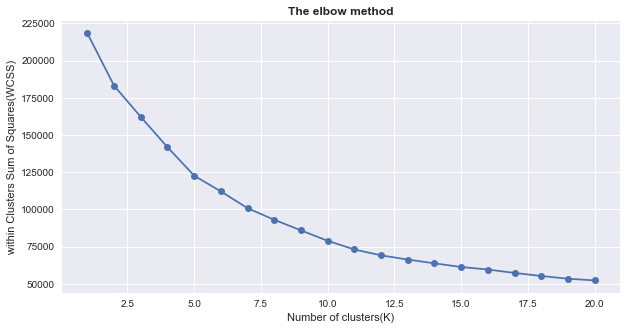

In [145]:
wcss=[]
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
# Plotting the results onto a line graph to help us observe 'The Elbow'
plt.figure(figsize=(10,5))
no_clusters=range(1,21)
plt.plot(no_clusters, wcss,marker = "o")
plt.title('The elbow method', fontweight="bold")
plt.xlabel('Number of clusters(K)')
plt.ylabel('within Clusters Sum of Squares(WCSS)')

In [146]:
print(silhouette_score(clusters, kmeans.labels_, metric='euclidean'))

0.2828673907750112


In [158]:
kmeans_new = KMeans(7)
#Fit the data
kmeans_new.fit(x)
#Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)

Text(0, 0.5, 'voice')

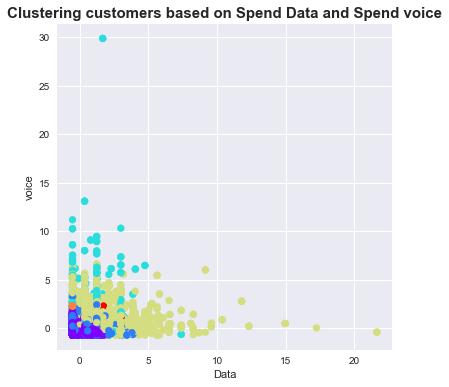

In [174]:
plt.figure(figsize=(6,6))
plt.scatter(clusters_new['spend_data'],clusters_new['spend_voice'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.title("Clustering customers based on Spend Data and Spend voice", fontsize=15,fontweight="bold")
plt.xlabel("Data")
plt.ylabel("voice")